In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import data
from datapreprocessing import preprocess

In [2]:
preprocess()

In [3]:
data.not_unavailable_elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [4]:
data.not_unavailable_elements_df["status"].unique()

array(['a', 'd', 'i', 's'], dtype=object)

In [5]:
possible_players = data.not_unavailable_elements_df[['code', 'team_code', 'team', 'element_type', 'start_cost']]

In [6]:
playersHistoryDict = data.getplayersHistoryDict()

In [7]:
playerStatsDict = {'season_name':[], 'element_code':[], 'start_cost': [], 'end_cost': [], 'total_points': [], 'minutes': [], 'goals_scored': [], 'assists': [], 'clean_sheets': [], 'goals_conceded': [], 'own_goals': [], 'penalties_saved': [], 'penalties_missed': [], 'yellow_cards': [], 'red_cards': [], 'saves': [], 'bonus': [], 'bps': [], 'influence': [], 'creativity': [], 'threat': [], 'ict_index': []}
for seasons in playersHistoryDict.values():
    for season in seasons:
        for key, value in season.items():
            playerStatsDict.get(key).append(value)

In [8]:
playerHistoryDf = pd.DataFrame(playerStatsDict)
playerHistoryDf['season_name'] = playerHistoryDf['season_name'].str[:2] + playerHistoryDf['season_name'].str[-2:]
playerHistoryDf['season_name'] = pd.to_numeric(playerHistoryDf['season_name'])
playerHistoryDf.head(10)

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index
0,2019,80201,50,49,106,2835,0,0,6,42,...,0,0,0,105,5,568,807.2,0.0,0.0,80.5
1,2020,80201,50,48,114,2649,0,0,7,39,...,0,2,0,113,10,591,843.2,0.0,0.0,84.1
2,2021,80201,50,50,131,3131,0,0,11,37,...,0,0,1,86,11,625,702.2,0.0,2.0,70.3
3,2021,115918,45,44,1,15,0,0,0,0,...,0,0,0,2,0,8,16.6,0.0,0.0,1.7
4,2014,47431,85,75,82,1677,4,3,9,15,...,0,3,1,0,7,104,0.0,0.0,0.0,0.0
5,2015,47431,80,77,104,2405,2,4,15,18,...,0,3,0,0,7,488,0.0,0.0,0.0,0.0
6,2016,47431,70,69,135,2740,5,10,8,40,...,0,5,0,0,12,605,0.0,0.0,0.0,0.0
7,2017,47431,75,70,114,1534,8,3,6,19,...,0,3,0,0,13,441,491.4,809.4,522.0,182.1
8,2018,47431,70,70,130,1874,6,8,9,19,...,0,1,0,0,13,522,640.0,891.5,715.0,224.5
9,2019,47431,75,71,108,2091,3,7,11,25,...,0,2,0,0,6,475,557.6,1165.5,742.0,246.7


In [63]:
playerHistoryDf.keys()

Index(['season_name', 'element_code', 'start_cost', 'end_cost', 'total_points',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index'],
      dtype='object')

In [9]:
variables = ['start_cost', 'total_points', 'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded', 'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'influence', 'creativity', 'threat', 'ict_index']

for column in variables:
    playerHistoryDf[column] = playerHistoryDf[column].astype(float)

In [10]:
def create1DCorrelationPlot(variable, variableList, columns, title):
    correlations = []
    for column in columns:
        correlations.append(variableList.corr(column))

    correlationDf = pd.DataFrame({"Correlation": correlations}, index=variables).drop(variable).sort_values(by=['Correlation'], ascending=False)

    plt.figure(figsize=(12, 7))
    plt.title(title)
    sb.heatmap(correlationDf, annot=True, fmt="g", cmap='viridis')
    plt.show()


In [11]:
def getColumnList(df):
    return [df.start_cost, df.total_points, df.minutes, df.goals_scored, df.assists, df.clean_sheets, df.goals_conceded, df.own_goals, df.penalties_saved, df.penalties_missed, df.yellow_cards, df.red_cards, df.saves, df.influence, df.creativity, df.threat, df.ict_index]

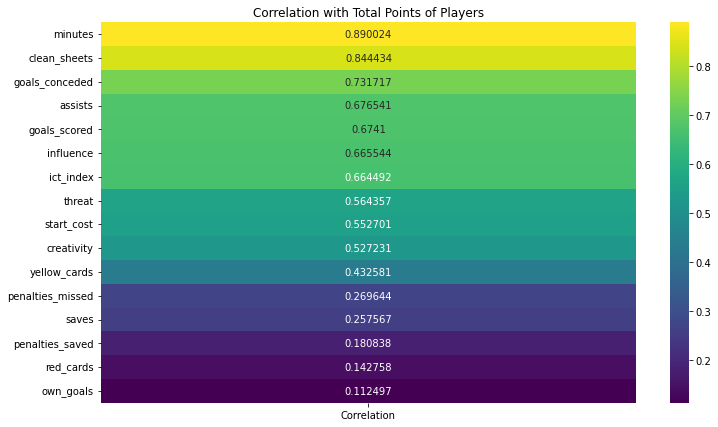

In [12]:
create1DCorrelationPlot('total_points', playerHistoryDf.total_points, getColumnList(playerHistoryDf), 'Correlation with Total Points of Players')

The amount of minutes a player plays for has a strong correlation with the total points a player recieves at the end of the season. Players in any positon can receieve points for the amount of minutes they play, which explains the strong correlation. Also, the more minutes a player plays, they will obviously have more opportunities to get points in other ways. However, I suspect that the correlations are likely to be slightly skewed, as many players do not play at all throughout the season, leaving them with zero minutes and of course, zero points.

Percentage of players who have not played a minute throughout the season: 13%


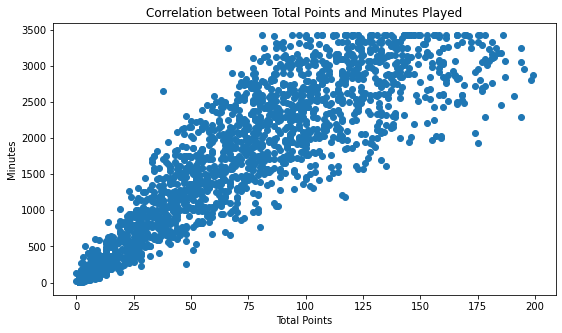

Correlation between total points and minutes (must have more than 0): 0.860196247246539


In [13]:
playerPlayedHistoryDf = playerHistoryDf[playerHistoryDf.minutes > 0]
print('Percentage of players who have not played a minute throughout the season: ' + str(int((len(playerHistoryDf.index) - len(playerPlayedHistoryDf.index)) / len(playerPlayedHistoryDf.index) * 100)) + '%')

# Removing outliers
totalPointsMinutesDf = playerPlayedHistoryDf[playerPlayedHistoryDf.total_points < 200][['total_points', 'minutes']]

plt.figure(figsize=(9, 5))
plt.scatter(totalPointsMinutesDf.total_points, totalPointsMinutesDf.minutes)
plt.xlabel('Total Points')
plt.ylabel('Minutes')
plt.title('Correlation between Total Points and Minutes Played')
plt.show()

print('Correlation between total points and minutes (must have more than 0): ' + str(playerPlayedHistoryDf.total_points.corr(playerPlayedHistoryDf.minutes)))

The correlation does not have much of a change, however, for the remaining correlation analysis, we will not be including the players who did not play, in order to avoid skewing the results.

The second strongest correlation is with clean sheets, which is likely because they can be obtained by an entire team in a match and for goalkeepers and defenders, a high number of points (4) are awarded for this variable. Furthermore, some of the point deducting actions involve conceding goals, which further increases the gap between the amount of points awarded for a clean sheet and not a clean sheet per game.

The third strongest correlation is with goals conceded. My theory is that this is a negative correlation which we can check using a scatter graph:

/var/folders/x2/wql3rm8s0618xhbyyms7r2q40000gn/T/ipykernel_43475/684655595.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  totalPointsGoalsConcededDf = playerPlayedHistoryDf[playerPlayedHistoryDf.total_points < 200][playerPlayedHistoryDf.goals_conceded < 60][['total_points', 'goals_conceded']]


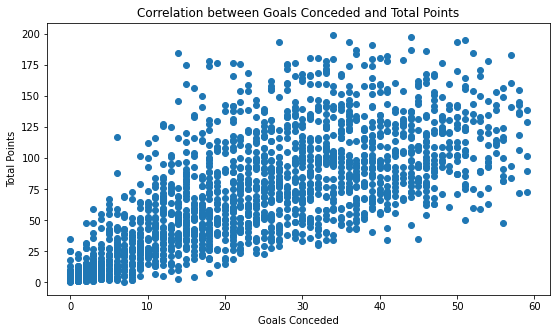

In [14]:
# Removing outliers
totalPointsGoalsConcededDf = playerPlayedHistoryDf[playerPlayedHistoryDf.total_points < 200][playerPlayedHistoryDf.goals_conceded < 60][['total_points', 'goals_conceded']]

plt.figure(figsize=(9, 5))
plt.scatter(totalPointsGoalsConcededDf.goals_conceded, totalPointsGoalsConcededDf.total_points)
plt.xlabel('Goals Conceded')
plt.ylabel('Total Points')
plt.title('Correlation between Goals Conceded and Total Points')
plt.show()

As we can see, this graph actually shows there isn't a negative correlation between the two variables, which means my theory is incorrect. There is no reason for there to be a direct positive correlation between these variables, so we can only assume that they both have a positive correlation to another variable. This is most likely to be the minutes variable, which we already know has a strong correlation with the total points.

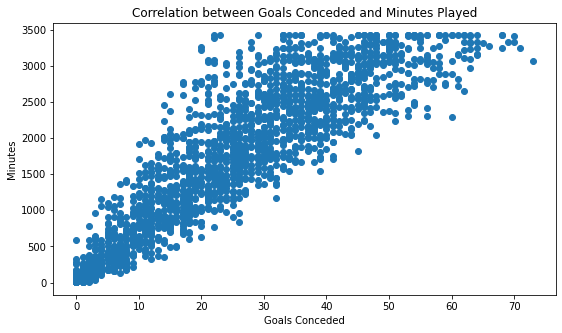

Correlation between minutes and goals conceded: 0.891162211384988


In [15]:
plt.figure(figsize=(9, 5))
plt.scatter(playerPlayedHistoryDf.goals_conceded, playerPlayedHistoryDf.minutes)
plt.xlabel('Goals Conceded')
plt.ylabel('Minutes')
plt.title('Correlation between Goals Conceded and Minutes Played')
plt.show()

print('Correlation between minutes and goals conceded: ' + str(playerPlayedHistoryDf.minutes.corr(playerPlayedHistoryDf.goals_conceded)))

There is also a very strong correlation between the minutes and goals conceded which makes it clear that the positive correlation between the goals conceded and total points is heavily reliant on the minutes variable.

One of the most interesting correlations is the weak correlation between the start cost and total points as shown in the scatter graph:

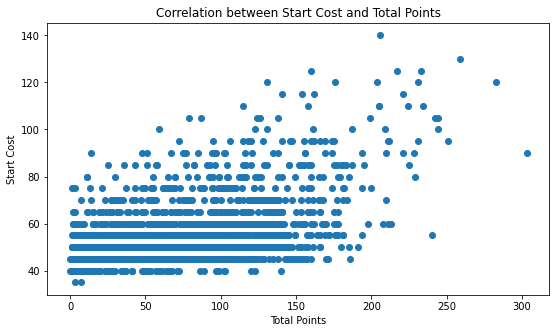

In [16]:
plt.figure(figsize=(9, 5))
plt.scatter(playerPlayedHistoryDf.total_points, playerPlayedHistoryDf.start_cost)
plt.xlabel('Total Points')
plt.ylabel('Start Cost')
plt.title('Correlation between Start Cost and Total Points')
plt.show()

We will need to investigate further as to whether the player's position affects this relationship as the average price of one position may be lower than another but gain more points.

As for the end_cost variable, there is a weak correlation across all of the players, which we assume is due to the average costs per position. However, we will not be investigating this as the end cost is dependant on the other variables and cannot be used to make a prediction as we do not have access to it until the end of the season. It is also redundant in terms of using the end cost from the previous season as we have access to the start cost of the current season.

The correlations between total points and goals and assists will be skewed due to the heat-map including players in all positions. Forwards and Midfielders are far more likely to get goals and assists, whereas goalkeepers and defenders very rarely get a goal or assist. However, as stated in the scoring system, the action which will award the most points is "For each goal scored by a goalkeeper or defender" (6)

In [17]:
playerPlayedHistoryDf['element_type'] = playerHistoryDf.element_code.map(data.elements_df.set_index('code').element_type)
gkHistoryDf = playerPlayedHistoryDf[playerPlayedHistoryDf['element_type'] == 1]
defHistoryDf = playerPlayedHistoryDf[playerPlayedHistoryDf['element_type'] == 2]
midHistoryDf = playerPlayedHistoryDf[playerPlayedHistoryDf['element_type'] == 3]
fwdHistoryDf = playerPlayedHistoryDf[playerPlayedHistoryDf['element_type'] == 4]

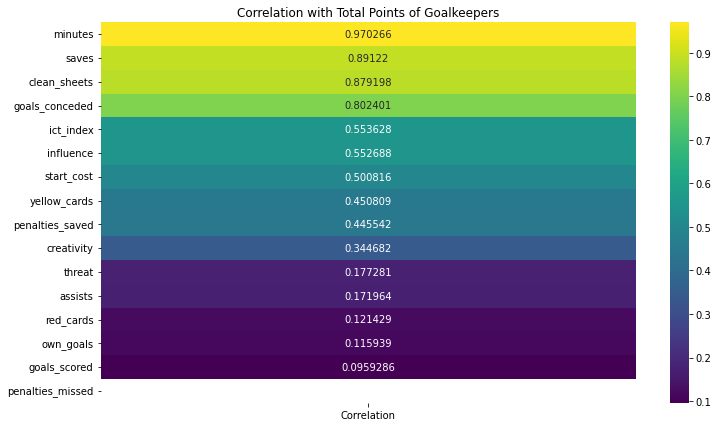

In [18]:
create1DCorrelationPlot('total_points', gkHistoryDf.total_points, getColumnList(gkHistoryDf), 'Correlation with Total Points of Goalkeepers')

For goalkeepers, the top correlation with the total points is the amount of minutes a player plays. This correlation is extremely strong as shown in the scatter graph below:

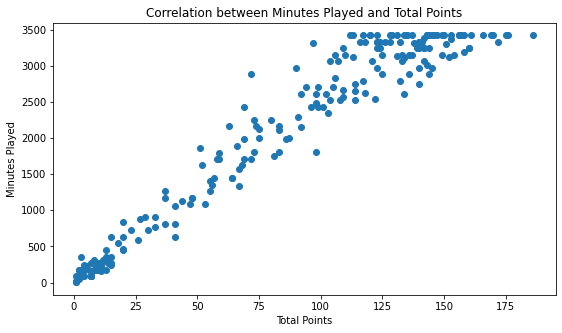

In [19]:
plt.figure(figsize=(9, 5))
plt.scatter(gkHistoryDf.total_points, gkHistoryDf.minutes)
plt.xlabel('Total Points')
plt.ylabel('Minutes Played')
plt.title('Correlation between Minutes Played and Total Points')
plt.show()

Using data from the Premier League's Stats Centre, from the 2006/07 season (when stats were first documented here) to the 2020/21 season, there has only been 113 occurances of a goalkeeper substitution across 5700 premier league matches, meaning that 99.98% of goalkeepers that start a match, have received the maximum amount of points from the scoring system for the two actions resulting in points awarded for just being on the pitch.

In [20]:
topGksDf = data.elements_df[data.elements_df['element_type'] == 1][['id', 'code', 'web_name', 'team', 'start_cost', 'total_points', 'points_per_game']].sort_values(by=['total_points'], ascending=False)
topGksDf = topGksDf.groupby('team').head(1).sort_values(by=['points_per_game'], ascending=False)
print(sum(topGksDf.start_cost)/20)
topGksDf

50.3


,id,code,web_name,team,start_cost,total_points,points_per_game
371,231,116535,Alisson,11,60,138,5.1
32,559,225321,Ramsdale,1,57,117,4.9
407,257,121160,Ederson,12,62,123,4.4
700,475,149065,Sá,20,56,131,4.4
210,143,228286,Mendy,6,62,102,4.2
563,353,37915,Lloris,17,53,114,3.9
432,270,51940,de Gea,13,52,113,3.9
86,80,154561,Raya,3,41,63,3.9
221,146,40836,Guaita,7,47,89,3.7
45,30,98980,Martínez,2,55,103,3.7


In [21]:
def mappingRange(df, column):
    return (df[column] - min(df[column]))/(max(df[column]) - min(df[column]))

In [22]:
def getRank(df, columns, columnNames, variableList):
    correlations = []
    for column in columns:
        correlations.append(variableList.corr(column))

    total = sum(correlations)
    rank = 0
    for i in range(len(columnNames)):
        rank += mappingRange(df, columnNames[i]) * (correlations[i] / total)

    return rank

In [23]:
topGksDf = data.elements_df[data.elements_df['element_type'] == 1][['id', 'code', 'web_name', 'team', 'start_cost', 'total_points', 'points_per_game']].sort_values(by=['start_cost'], ascending=False)
topGksDf['minutes'] = topGksDf.code.map(gkHistoryDf[gkHistoryDf['season_name'] == '2020/21'].set_index('element_code').minutes)
topGksDf['total_points'] = topGksDf.code.map(gkHistoryDf[gkHistoryDf['season_name'] == '2020/21'].set_index('element_code').total_points)
topGksDf['saves'] = topGksDf.code.map(gkHistoryDf[gkHistoryDf['season_name'] == '2020/21'].set_index('element_code').saves)
topGksDf['clean_sheets'] = topGksDf.code.map(gkHistoryDf[gkHistoryDf['season_name'] == '2020/21'].set_index('element_code').clean_sheets)
topGksDf['strength_defence'] = (topGksDf.team.map(data.teams_df.set_index('id').strength_defence_home) + topGksDf.team.map(data.teams_df.set_index('id').strength_defence_away))/2
topGksDf['ranking'] = getRank(topGksDf, [gkHistoryDf.minutes, gkHistoryDf.saves, gkHistoryDf.clean_sheets], ['minutes', 'saves', 'clean_sheets'], gkHistoryDf.total_points)
topGksDf['points_per_game'] = pd.to_numeric(topGksDf['points_per_game'], downcast="float")
topGksDf.sort_values(by=['total_points'], ascending=False).head(20)

,id,code,web_name,team,start_cost,total_points,points_per_game,minutes,saves,clean_sheets,strength_defence,ranking
407,257,121160,Ederson,12,62,NaN,4.4,NaN,NaN,NaN,1350.0,NaN
210,143,228286,Mendy,6,62,NaN,4.2,NaN,NaN,NaN,1270.0,NaN
371,231,116535,Alisson,11,60,NaN,5.1,NaN,NaN,NaN,1345.0,NaN
32,559,225321,Ramsdale,1,57,NaN,4.9,NaN,NaN,NaN,1205.0,NaN
700,475,149065,Sá,20,56,NaN,4.4,NaN,NaN,NaN,1090.0,NaN
45,30,98980,Martínez,2,55,NaN,3.7,NaN,NaN,NaN,1090.0,NaN
563,353,37915,Lloris,17,53,NaN,3.9,NaN,NaN,NaN,1210.0,NaN
170,112,98747,Pope,5,53,NaN,3.6,NaN,NaN,NaN,1080.0,NaN
432,270,51940,de Gea,13,52,NaN,3.9,NaN,NaN,NaN,1195.0,NaN
646,408,37096,Fabianski,19,50,NaN,3.5,NaN,NaN,NaN,1170.0,NaN


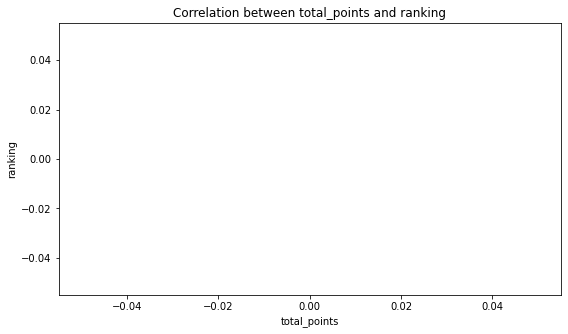

In [24]:
plt.figure(figsize=(9, 5))
plt.scatter(topGksDf.total_points, topGksDf.ranking)
plt.xlabel('total_points')
plt.ylabel('ranking')
plt.title('Correlation between total_points and ranking')
plt.show()

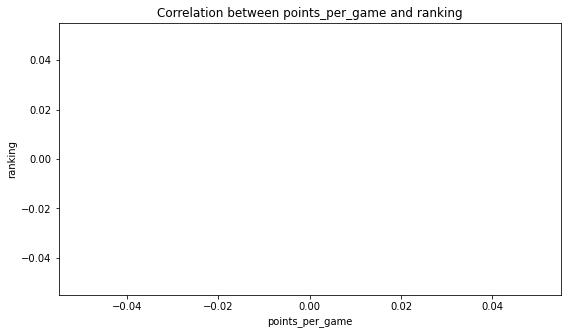

In [25]:
plt.figure(figsize=(9, 5))
plt.scatter(topGksDf.points_per_game, topGksDf.ranking)
plt.xlabel('points_per_game')
plt.ylabel('ranking')
plt.title('Correlation between points_per_game and ranking')
plt.show()

In [26]:
topGksDf = topGksDf.groupby('team').head(1).sort_values(by=['ranking'], ascending=False)
topGksDf

,id,code,web_name,team,start_cost,total_points,points_per_game,minutes,saves,clean_sheets,strength_defence,ranking
407,257,121160,Ederson,12,62,NaN,4.4,NaN,NaN,NaN,1350.0,NaN
210,143,228286,Mendy,6,62,NaN,4.2,NaN,NaN,NaN,1270.0,NaN
371,231,116535,Alisson,11,60,NaN,5.1,NaN,NaN,NaN,1345.0,NaN
32,559,225321,Ramsdale,1,57,NaN,4.9,NaN,NaN,NaN,1205.0,NaN
700,475,149065,Sá,20,56,NaN,4.4,NaN,NaN,NaN,1090.0,NaN
45,30,98980,Martínez,2,55,NaN,3.7,NaN,NaN,NaN,1090.0,NaN
563,353,37915,Lloris,17,53,NaN,3.9,NaN,NaN,NaN,1210.0,NaN
170,112,98747,Pope,5,53,NaN,3.6,NaN,NaN,NaN,1080.0,NaN
432,270,51940,de Gea,13,52,NaN,3.9,NaN,NaN,NaN,1195.0,NaN
646,408,37096,Fabianski,19,50,NaN,3.5,NaN,NaN,NaN,1170.0,NaN


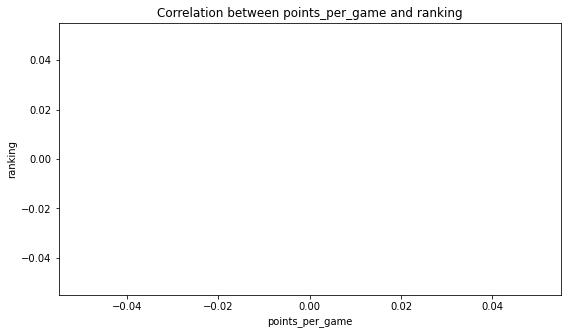

In [27]:
plt.figure(figsize=(9, 5))
plt.scatter(topGksDf.points_per_game, topGksDf.ranking)
plt.xlabel('points_per_game')
plt.ylabel('ranking')
plt.title('Correlation between points_per_game and ranking')
plt.show()

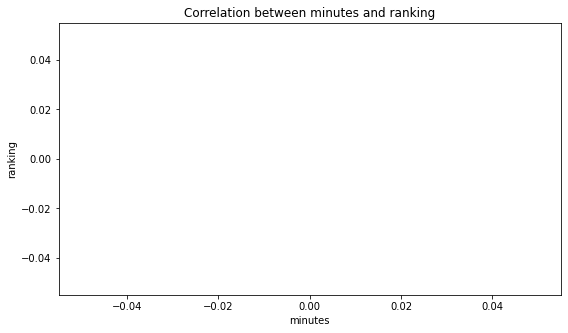

In [28]:
plt.figure(figsize=(9, 5))
plt.scatter(topGksDf.minutes, topGksDf.ranking)
plt.xlabel('minutes')
plt.ylabel('ranking')
plt.title('Correlation between minutes and ranking')
plt.show()

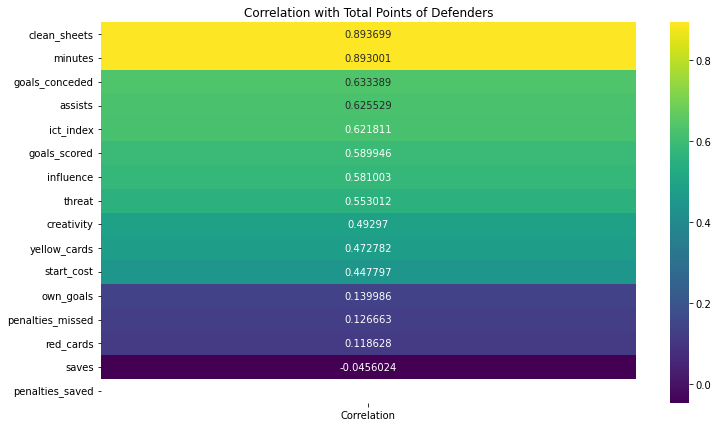

In [29]:
create1DCorrelationPlot('total_points', defHistoryDf.total_points, getColumnList(defHistoryDf), 'Correlation with Total Points of Defenders')

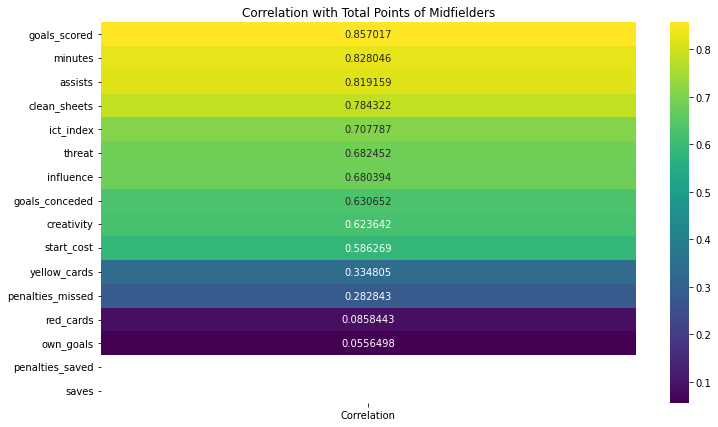

In [30]:
create1DCorrelationPlot('total_points', midHistoryDf.total_points, getColumnList(midHistoryDf), 'Correlation with Total Points of Midfielders')

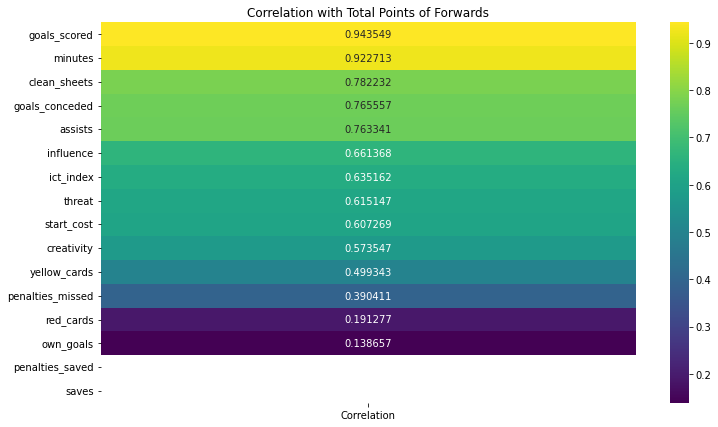

In [31]:
create1DCorrelationPlot('total_points', fwdHistoryDf.total_points, getColumnList(fwdHistoryDf), 'Correlation with Total Points of Forwards')

Desipite there being a strong correlation between total points and clean sheets, as stated in the scoring system, forwards do not recieve points for clean sheets and only goalkeepers and defenders and deducted points for goals conceded. We will investigate whether these variables have any correlation with the other strong-correlating variables as this would explain their correlations with the total points.

In [32]:
possible_gks = possible_players[possible_players['element_type'] == 1]
possible_defs = possible_players[possible_players['element_type'] == 2]
possible_mids = possible_players[possible_players['element_type'] == 3]
possible_fwds = possible_players[possible_players['element_type'] == 4]

In [33]:
gkHistoryDf['season_name'].unique()

array([2019, 2020, 2021, 2015, 2017, 2018, 2010, 2011, 2012, 2014, 2016,
       2009, 2013, 2008, 2007])

In [34]:
gkHistoryDf.columns

Index(['season_name', 'element_code', 'start_cost', 'end_cost', 'total_points',
       'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'element_type'],
      dtype='object')

In [35]:
def calcSeasonCorr(df, firstSeason, lastSeason, variable, variable2, seasonsCount):
    avg_correlations = {}

    for timeframe in range(1, seasonsCount + 1):
        correlations = []
        weighting = []
        for year in range(firstSeason, lastSeason - timeframe):
            years = pd.merge(df.loc[df['season_name'] == year], df.loc[df['season_name'] == year + timeframe], on='element_code')
            if len(years) > 0:
                avgYearCorr = years[variable + '_x'].corr(years[variable2 + '_y'])
                if avgYearCorr > 0:
                    correlations.append(avgYearCorr)
                    weighting.append(len(years))
        corr_key = str(timeframe) + ' year'
        avg_correlations[corr_key] = 0
        for count in range(len(correlations)):
            avg_correlations[corr_key] += correlations[count] * (weighting[count]/sum(weighting))

    return avg_correlations

In [36]:
def calcWeightPerVar(correlations):
    weighting = {}
    for key in correlations:
        weighting[key] = correlations[key]/sum(correlations.values())
    return weighting

In [37]:
def getWeightCorr(model, variable, variable2, df, seasonsCount):
    temp = variable + '_to_' + variable2
    model[temp] = {}
    model.get(temp)['correlations'] = {}
    
    #gets the correlations across each time-frame
    model[temp].get('correlations')['correlation'] = calcSeasonCorr(df, df['season_name'].min(), df['season_name'].max(), variable, variable2, seasonsCount)

    #gets the weighting based on the correlation across each time-frame
    model[temp].get('correlations')['weighting'] = calcWeightPerVar(model[temp].get('correlations').get('correlation'))

    return model

In [38]:
playerModel = {}

for variable in playerHistoryDf.keys():
    try:
        playerModel = getWeightCorr(playerModel, variable, 'total_points', playerHistoryDf, 3)
    except:
        continue

print(playerModel)

print()

for a in playerModel.keys():
    print(a, playerModel.get(a).get('correlations').get('correlation'))

{'season_name_to_total_points': {'correlations': {'correlation': {'1 year': 0, '2 year': 0, '3 year': 0}}}, 'element_code_to_total_points': {'correlations': {}}, 'start_cost_to_total_points': {'correlations': {'correlation': {'1 year': 0.4488745648752282, '2 year': 0.3737816670191515, '3 year': 0.2710130492811799}, 'weighting': {'1 year': 0.41042989192559504, '2 year': 0.3417684609531889, '3 year': 0.2478016471212159}}}, 'end_cost_to_total_points': {'correlations': {'correlation': {'1 year': 0.49427384571715216, '2 year': 0.4129106954917149, '3 year': 0.29374330599889037}, 'weighting': {'1 year': 0.41157663790241356, '2 year': 0.34382639760728473, '3 year': 0.24459696449030177}}}, 'total_points_to_total_points': {'correlations': {'correlation': {'1 year': 0.6490839990290815, '2 year': 0.4831894090660851, '3 year': 0.3131530403779034}, 'weighting': {'1 year': 0.44906055214000373, '2 year': 0.334288479068942, '3 year': 0.2166509687910542}}}, 'minutes_to_total_points': {'correlations': {'

In [39]:
gkModel = {}

gkModel = getWeightCorr(gkModel, 'minutes', 'minutes', gkHistoryDf, 1)
gkModel = getWeightCorr(gkModel, 'saves', 'saves', gkHistoryDf, 1)
gkModel = getWeightCorr(gkModel, 'clean_sheets', 'clean_sheets', gkHistoryDf, 2)

print(gkModel)

print()

for a in gkModel.keys():
    print(a, gkModel.get(a).get('correlations').get('correlation'))

{'minutes_to_minutes': {'correlations': {'correlation': {'1 year': 0.5385186317843598}, 'weighting': {'1 year': 1.0}}}, 'saves_to_saves': {'correlations': {'correlation': {'1 year': 0.5276856396638427}, 'weighting': {'1 year': 1.0}}}, 'clean_sheets_to_clean_sheets': {'correlations': {'correlation': {'1 year': 0.5592076535355107, '2 year': 0.5234100295252871}, 'weighting': {'1 year': 0.5165329019515993, '2 year': 0.4834670980484007}}}}

minutes_to_minutes {'1 year': 0.5385186317843598}
saves_to_saves {'1 year': 0.5276856396638427}
clean_sheets_to_clean_sheets {'1 year': 0.5592076535355107, '2 year': 0.5234100295252871}


In [40]:
defModel = {}

defModel = getWeightCorr(defModel, 'clean_sheets', 'clean_sheets', defHistoryDf, 1)
defModel = getWeightCorr(defModel, 'minutes', 'minutes', defHistoryDf, 1)

print(defModel)

print()

for a in defModel.keys():
    print(a, defModel.get(a).get('correlations').get('correlation'))

{'clean_sheets_to_clean_sheets': {'correlations': {'correlation': {'1 year': 0.4281614484374195}, 'weighting': {'1 year': 1.0}}}, 'minutes_to_minutes': {'correlations': {'correlation': {'1 year': 0.4726743225406256}, 'weighting': {'1 year': 1.0}}}}

clean_sheets_to_clean_sheets {'1 year': 0.4281614484374195}
minutes_to_minutes {'1 year': 0.4726743225406256}


In [41]:
midModel = {}

midModel = getWeightCorr(midModel, 'goals_scored', 'goals_scored', midHistoryDf, 2)
midModel = getWeightCorr(midModel, 'minutes', 'minutes', midHistoryDf, 1)
midModel = getWeightCorr(midModel, 'assists', 'assists', midHistoryDf, 1)

print(midModel)

print()

for a in midModel.keys():
    print(a, midModel.get(a).get('correlations').get('correlation'))

{'goals_scored_to_goals_scored': {'correlations': {'correlation': {'1 year': 0.6343135250545865, '2 year': 0.5773663099349033}, 'weighting': {'1 year': 0.5234992831749887, '2 year': 0.4765007168250114}}}, 'minutes_to_minutes': {'correlations': {'correlation': {'1 year': 0.5591402141138542}, 'weighting': {'1 year': 1.0}}}, 'assists_to_assists': {'correlations': {'correlation': {'1 year': 0.46526279832541917}, 'weighting': {'1 year': 1.0}}}}

goals_scored_to_goals_scored {'1 year': 0.6343135250545865, '2 year': 0.5773663099349033}
minutes_to_minutes {'1 year': 0.5591402141138542}
assists_to_assists {'1 year': 0.46526279832541917}


In [42]:
fwdModel = {}

fwdModel = getWeightCorr(fwdModel, 'goals_scored', 'goals_scored', fwdHistoryDf, 2)
fwdModel = getWeightCorr(fwdModel, 'minutes', 'minutes', fwdHistoryDf, 2)

print(fwdModel)

for a in fwdModel.keys():
    print(a, fwdModel.get(a).get('correlations').get('correlation'))

{'goals_scored_to_goals_scored': {'correlations': {'correlation': {'1 year': 0.6670958086194891, '2 year': 0.6464812887303315}, 'weighting': {'1 year': 0.5078467110650559, '2 year': 0.49215328893494414}}}, 'minutes_to_minutes': {'correlations': {'correlation': {'1 year': 0.6538850624183657, '2 year': 0.5979084460001169}, 'weighting': {'1 year': 0.5223585663457265, '2 year': 0.47764143365427353}}}}
goals_scored_to_goals_scored {'1 year': 0.6670958086194891, '2 year': 0.6464812887303315}
minutes_to_minutes {'1 year': 0.6538850624183657, '2 year': 0.5979084460001169}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dty

In [43]:
def calcCorrAndWeighting(model):
    total = 0
    for a in model.keys():
        tempCorr = model.get(a).get('correlations').get('correlation').values()
        model.get(a)['average_correlation'] = sum(tempCorr)/len(tempCorr)
        total += model.get(a).get('average_correlation')


    for a in model.keys():
        model.get(a)['overall_weighting'] = model.get(a).get('average_correlation') / total

In [44]:
calcCorrAndWeighting(gkModel)
calcCorrAndWeighting(defModel)
calcCorrAndWeighting(midModel)
calcCorrAndWeighting(fwdModel)

In [45]:
print(gkModel)
print()
print(defModel)
print()
print(midModel)
print()
print(fwdModel)

{'minutes_to_minutes': {'correlations': {'correlation': {'1 year': 0.5385186317843598}, 'weighting': {'1 year': 1.0}}, 'average_correlation': 0.5385186317843598, 'overall_weighting': 0.3350010817557345}, 'saves_to_saves': {'correlations': {'correlation': {'1 year': 0.5276856396638427}, 'weighting': {'1 year': 1.0}}, 'average_correlation': 0.5276856396638427, 'overall_weighting': 0.328262105859952}, 'clean_sheets_to_clean_sheets': {'correlations': {'correlation': {'1 year': 0.5592076535355107, '2 year': 0.5234100295252871}, 'weighting': {'1 year': 0.5165329019515993, '2 year': 0.4834670980484007}}, 'average_correlation': 0.5413088415303989, 'overall_weighting': 0.3367368123843134}}

{'clean_sheets_to_clean_sheets': {'correlations': {'correlation': {'1 year': 0.4281614484374195}, 'weighting': {'1 year': 1.0}}, 'average_correlation': 0.4281614484374195, 'overall_weighting': 0.47529356874068285}, 'minutes_to_minutes': {'correlations': {'correlation': {'1 year': 0.4726743225406256}, 'weight

In [46]:
data.teams_df.keys()

Index(['code', 'draw', 'form', 'id', 'loss', 'name', 'played', 'points',
       'position', 'short_name', 'strength', 'unavailable', 'win',
       'strength_overall_home', 'strength_overall_away',
       'strength_attack_home', 'strength_attack_away', 'strength_defence_home',
       'strength_defence_away', 'pulse_id', 'goals_for', 'goals_against',
       'goal_difference', 'badge'],
      dtype='object')

In [47]:
teamFixtureDiff = {}

for team in data.teams_df['id']:
    teamFixtureDiff[team] = 0

for fixture in data.fixtures_df.iterrows():
    teamFixtureDiff[fixture[1][9]] += fixture[1][15] / 38
    teamFixtureDiff[fixture[1][11]] += fixture[1][14] / 38

data.teams_df['overall_avg_team_fixture_difficulty'] = data.teams_df.id.map(pd.Series(teamFixtureDiff))

data.teams_df.sort_values('overall_avg_team_fixture_difficulty')

data.teams_df[['name', 'strength']]

,name,strength
0,Arsenal,4
1,Aston Villa,3
2,Brentford,2
3,Brighton,3
4,Burnley,2
5,Chelsea,4
6,Crystal Palace,3
7,Everton,2
8,Leicester,3
9,Leeds,3


In [48]:
possible_players['overall_avg_team_fixture_difficulty'] = data.not_unavailable_elements_df.team.map(pd.Series(teamFixtureDiff))
possible_players

,code,team_code,team,element_type,start_cost,overall_avg_team_fixture_difficulty
0,80201,3,1,1,40,2.736842
4,58822,3,1,2,39,2.736842
5,59966,3,1,4,83,2.736842
6,84450,3,1,3,46,2.736842
10,153256,3,1,3,43,2.736842
...,...,...,...,...,...,...
705,184754,39,20,4,53,2.789474
707,518504,39,20,1,40,2.789474
708,490721,39,20,2,40,2.789474
710,510362,39,20,2,45,2.789474


In [49]:
possible_players['team_strength'] = possible_players.team.map(data.teams_df.set_index('id').strength)
possible_players

,code,team_code,team,element_type,start_cost,overall_avg_team_fixture_difficulty,team_strength
0,80201,3,1,1,40,2.736842,4
4,58822,3,1,2,39,2.736842,4
5,59966,3,1,4,83,2.736842,4
6,84450,3,1,3,46,2.736842,4
10,153256,3,1,3,43,2.736842,4
...,...,...,...,...,...,...,...
705,184754,39,20,4,53,2.789474,3
707,518504,39,20,1,40,2.789474,3
708,490721,39,20,2,40,2.789474,3
710,510362,39,20,2,45,2.789474,3


In [50]:
possible_players.overall_avg_team_fixture_difficulty.corr(possible_players.team_strength)

-0.9129293122411608

In [51]:
topHalfGks = gkHistoryDf.sort_values("total_points", ascending=False).head(int((round(len(gkHistoryDf.sort_values("total_points")))/5)))
topHalfDefs = defHistoryDf.sort_values("total_points", ascending=False).head(int((round(len(defHistoryDf.sort_values("total_points")))/5)))
topHalfMids = midHistoryDf.sort_values("total_points", ascending=False).head(int((round(len(midHistoryDf.sort_values("total_points")))/5)))
topHalfFwds = fwdHistoryDf.sort_values("total_points", ascending=False).head(int((round(len(fwdHistoryDf.sort_values("total_points")))/5)))

Above we get the top 50% of GKs who have played more than 0 minutes, based on total_points

In [52]:
topHalfGksAvgCost = sum(topHalfGks["start_cost"])/len(topHalfGks)
topHalfDefsAvgCost = sum(topHalfDefs["start_cost"])/len(topHalfDefs)
topHalfMidsAvgCost = sum(topHalfMids["start_cost"])/len(topHalfMids)
topHalfFwdsAvgCost = sum(topHalfFwds["start_cost"])/len(topHalfFwds)

We then get the average cost per position as shown above

Then we can work out how we want to split our budget by using the average cost per player and also the amount of players we need to pick per position:

In [53]:
numOfGks = 2
numOfDefs = 5
numOfMids = 5
numOfFwds = 3

numPerPos = [numOfGks, numOfDefs, numOfMids, numOfFwds]

In [54]:
idealGksCost = topHalfGksAvgCost * numOfGks
idealDefsCost = topHalfDefsAvgCost * numOfDefs
idealMidsCost = topHalfMidsAvgCost * numOfMids
idealFwdsCost = topHalfFwdsAvgCost * numOfFwds
idealTotalCost = idealGksCost + idealDefsCost + idealMidsCost + idealFwdsCost
idealTotalCost

992.0450189158232

In [55]:
totalBudget = 1000 #100M (starting budget)

gkTotalBudget = np.floor((idealGksCost/idealTotalCost)*totalBudget)
defTotalBudget = np.floor((idealDefsCost/idealTotalCost)*totalBudget)
midTotalBudget = np.floor((idealMidsCost/idealTotalCost)*totalBudget)
fwdTotalBudget = np.floor((idealFwdsCost/idealTotalCost)*totalBudget)

gkAvgBudget = np.floor(gkTotalBudget/numOfGks)
defAvgBudget = np.floor(defTotalBudget/numOfDefs)
midAvgBudget = np.floor(midTotalBudget/numOfMids)
fwdAvgBudget = np.floor(fwdTotalBudget/numOfFwds)
avgPerPos = [gkAvgBudget, defAvgBudget, midAvgBudget, fwdAvgBudget]

print(gkAvgBudget, defAvgBudget, midAvgBudget, fwdAvgBudget)
print(gkTotalBudget, defTotalBudget, midTotalBudget, fwdTotalBudget)
print(gkTotalBudget + defTotalBudget + midTotalBudget + fwdTotalBudget)

(gkAvgBudget*numOfGks) + (defAvgBudget*numOfDefs) + (midAvgBudget*numOfMids) + (fwdAvgBudget*numOfFwds)

52.0 55.0 72.0 84.0
104.0 278.0 363.0 253.0
998.0


991.0

Above is the appropriate budgeting across each position

In [56]:
def calculatePriceRange(numInPos, minPrice, maxPrice, avg):
    totalRange = min(avg - minPrice, maxPrice - avg) * 2

    minRange = avg - totalRange / 2
    maxRange = avg + totalRange / 2

    percentiles = [minRange]
    for i in range(1, int(numInPos)):
        percentiles.append(np.floor(((((100 / numInPos)/100) * i) * totalRange) + minRange))

    percentiles.append(maxRange)
    return percentiles

In [57]:
posHistory = [gkHistoryDf, defHistoryDf, midHistoryDf, fwdHistoryDf]
posDfs = []

In [58]:
playersPerPosInBudget = [[], [], [], []]

for pos in range(len(posHistory)):
    posDfs.append(data.elements_df[data.elements_df["code"].isin(posHistory[pos]["element_code"])])
    costs = posDfs[pos]["start_cost"]
    priceRanges = calculatePriceRange(numPerPos[pos], min(posDfs[pos]["start_cost"]), max(posDfs[pos]["start_cost"]), avgPerPos[pos])
    for i in range(numPerPos[pos]):
        playersPerPosInBudget[pos].append(posDfs[pos][posDfs[pos]["start_cost"].between(priceRanges[i], priceRanges[i+1])][["code", "start_cost"]])

The above code works but have decided to make an amendment so that any player below the max price can be taken, rather than between two prices as if we have a player who fits our model best but is cheaper than the allotted budget it makes no sense to ignore them when ultimately it will allow us to allot our budget somewhere more effective.

In [59]:
playersPerPosInBudget = [[], [], [], []]

for pos in range(len(posHistory)):
    posDfs.append(data.elements_df[data.elements_df["code"].isin(posHistory[pos]["element_code"])])
    costs = posDfs[pos]["start_cost"]
    priceRanges = calculatePriceRange(numPerPos[pos], min(posDfs[pos]["start_cost"]), max(posDfs[pos]["start_cost"]), avgPerPos[pos])
    for i in range(numPerPos[pos]):
        playersPerPosInBudget[pos].append(posDfs[pos][posDfs[pos]["start_cost"] <= priceRanges[i+1]][["code", "start_cost"]])

We can then access the different player options for each position by using the following:

playersPerPosInBudget[*Position*][*Price Range*]

Positions:
0 - Goalkeeper
1 - Defender
2 - Midfielder
3 - Forward

Price Range:
Lower - Cheaper
Higher - Expensive

*Each position have a different number of price ranges which is based on the amount of players allowed in that position. e.g. GKs have price ranges 0 and 1 as there can only be 2 GKs per team. Defenders have 5 price ranges (0-4) as there are 5 defenders in each team.

In [60]:
playersPerPosInBudget[1][4]

,code,start_cost
4,58822,39
7,92371,39
8,98745,46
9,111457,39
12,156074,37
...,...,...
683,114128,45
687,200402,46
689,214048,47
693,441271,38


Next I am attempting to make an adjustment so that when we pick a player who does not use all of the budget, the budget is pushed to the next player's allowance.

In [61]:
posHistoryDfs = [gkHistoryDf]
topHalfGks = posHistoryDfs[0].sort_values("total_points", ascending=False).head(int((round(len(posHistoryDfs[0].sort_values("total_points")))/5)))
topHalfPerPos = [topHalfGks]

numOfGks = 2
numPerPos1 = [numOfGks]

totalBudget = 1000

idealGksCost = sum(topHalfPerPos[0]["start_cost"])/len(topHalfPerPos[0]) * numPerPos1[0]
idealCostPerPos = [idealGksCost]

gkTotalBudget = np.floor((idealCostPerPos[0]/sum(idealCostPerPos))*totalBudget)

gkAvgBudget = np.floor(gkTotalBudget/numOfGks)

In [62]:
playersPerPosInBudget = [[], [], [], []]
playerTest = pd.DataFrame(columns=["code", "start_cost"])

for pos in range(len(posHistory)):
    posDfs.append(data.elements_df[data.elements_df["code"].isin(posHistory[pos]["element_code"])])
    costs = posDfs[pos]["start_cost"]
    priceRanges = calculatePriceRange(numPerPos[pos], min(posDfs[pos]["start_cost"]), max(posDfs[pos]["start_cost"]), avgPerPos[pos])
    print(priceRanges)
    for i in range(numPerPos[pos]):
        top = 1
        duplicate = True
        while duplicate:
            player = posDfs[pos][posDfs[pos]["start_cost"] <= priceRanges[i+1]].iloc[[top]][["code", "element_type", "start_cost"]]
            if player['code'].iloc[0] in playerTest["code"].tolist():
                top += 1
            else:
                playerTest = pd.concat([playerTest, player])
                duplicate = False

print(sum(playerTest["start_cost"]))
playerTest

[42.0, 52.0, 62.0]
[34.0, 42.0, 50.0, 59.0, 67.0, 76.0]
[39.0, 52.0, 65.0, 78.0, 91.0, 105.0]
[43.0, 70.0, 97.0, 125.0]
750


,code,start_cost,element_type
1,115918,40,1.0
32,225321,57,1.0
7,92371,39,2.0
8,98745,46,2.0
9,111457,39,2.0
12,156074,37,2.0
14,192895,52,2.0
10,153256,43,3.0
6,84450,46,3.0
11,154043,49,3.0
